In [5]:
#Installing required libraries
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium

In [7]:
#Importing required Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [9]:
#Importing Data

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')
df.describe()

Data downloaded and read into a dataframe!


,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [11]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

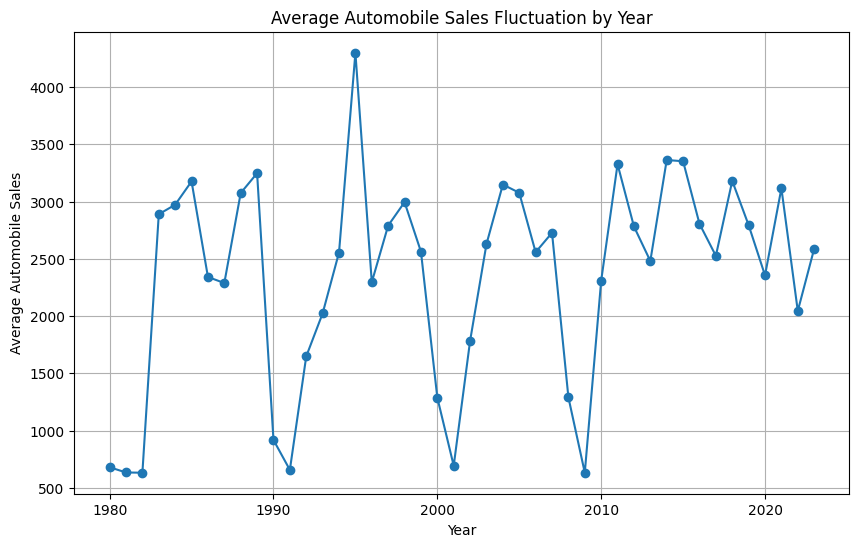

In [12]:
#Creating Visualizations for Data Analysis
# Group by Year and calculate average Automobile_Sales for each year
avg_sales_per_year = df.groupby('Year')['Automobile_Sales'].mean()

# Plot line chart using pandas .plot() with kind='line'
ax = avg_sales_per_year.plot(kind='line', figsize=(10,6), marker='o')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Automobile Sales')
ax.set_title('Average Automobile Sales Fluctuation by Year')

# Show grid for better readability
ax.grid(True)

# Show the plot
plt.show()


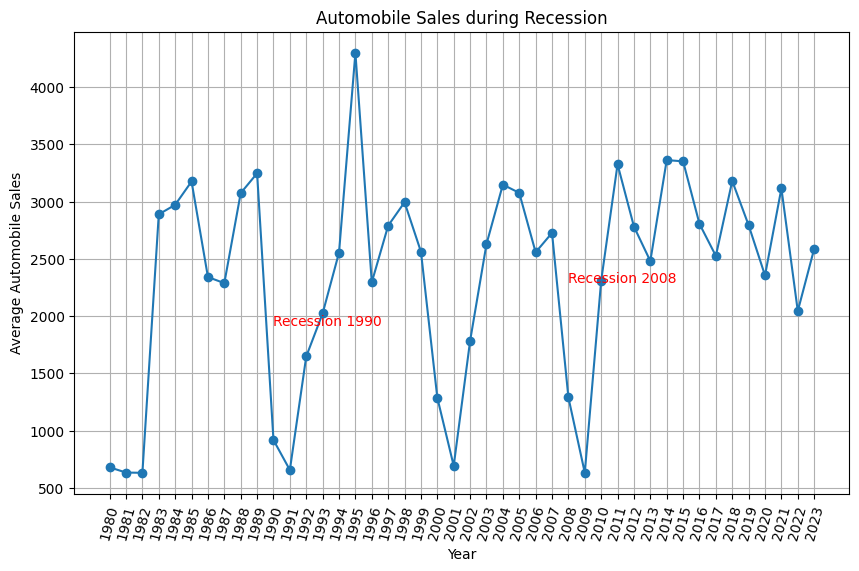

In [13]:
#Showing annotation for at least two years of recession
import matplotlib.pyplot as plt

# Group by Year and calculate average Automobile_Sales
avg_sales_per_year = df.groupby('Year')['Automobile_Sales'].mean()

# Plot line chart with pandas plot
ax = avg_sales_per_year.plot(kind='line', figsize=(10,6), marker='o')

# Set x-axis ticks for all years 1980 to 2023 and rotate for readability
plt.xticks(ticks=range(1980, 2024), rotation=75)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Automobile Sales')
ax.set_title('Automobile Sales during Recession')

# Add grid for better readability
ax.grid(True)

# Annotate for two recession years - example: 1990 and 2008 (you can adjust based on dataset)
plt.text(1990, avg_sales_per_year[1990] + 1000, 'Recession 1990', color='red', fontsize=10)
plt.text(2008, avg_sales_per_year[2008] + 1000, 'Recession 2008', color='red', fontsize=10)

# Show the plot
plt.show()



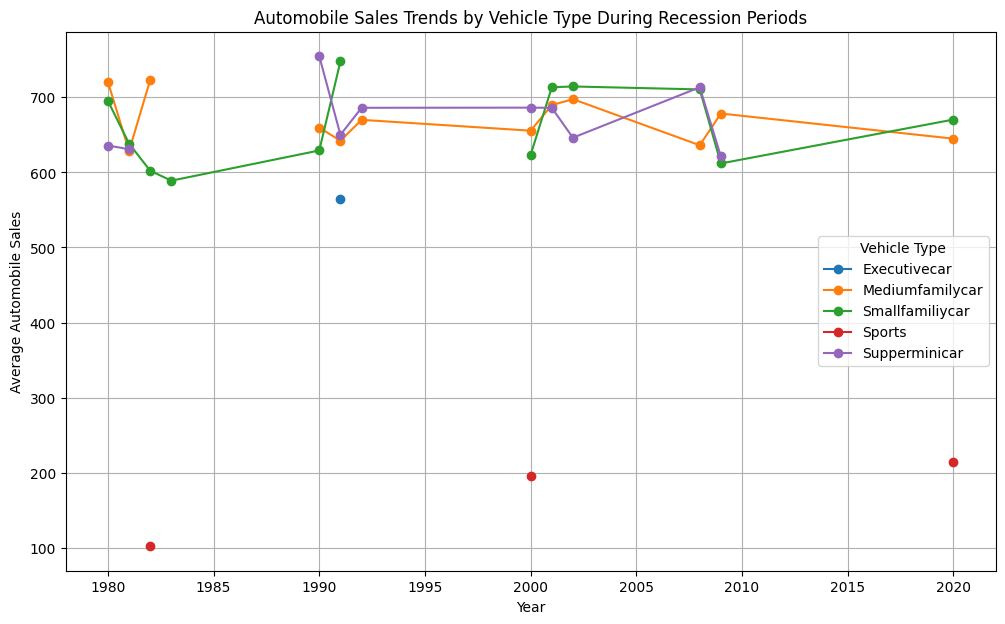

In [14]:
#Automobile Sales Trends by Vehicle Type During Recession Periods
import matplotlib.pyplot as plt

# Filter dataframe for recession period where Recession = 1
recession_df = df[df['Recession'] == 1]

# Group by Year and Vehicle_Type, calculate average Automobile_Sales with as_index=False
grouped = recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Pivot the dataframe to have Year as index and Vehicle_Type columns for plotting
pivot_df = grouped.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')

# Plot line chart with separate lines for each Vehicle_Type during recession years
ax = pivot_df.plot(kind='line', figsize=(12,7), marker='o')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Automobile Sales')
ax.set_title('Automobile Sales Trends by Vehicle Type During Recession Periods')

# Add grid
ax.grid(True)

# Show legend properly
plt.legend(title='Vehicle Type')

# Show the plot
plt.show()


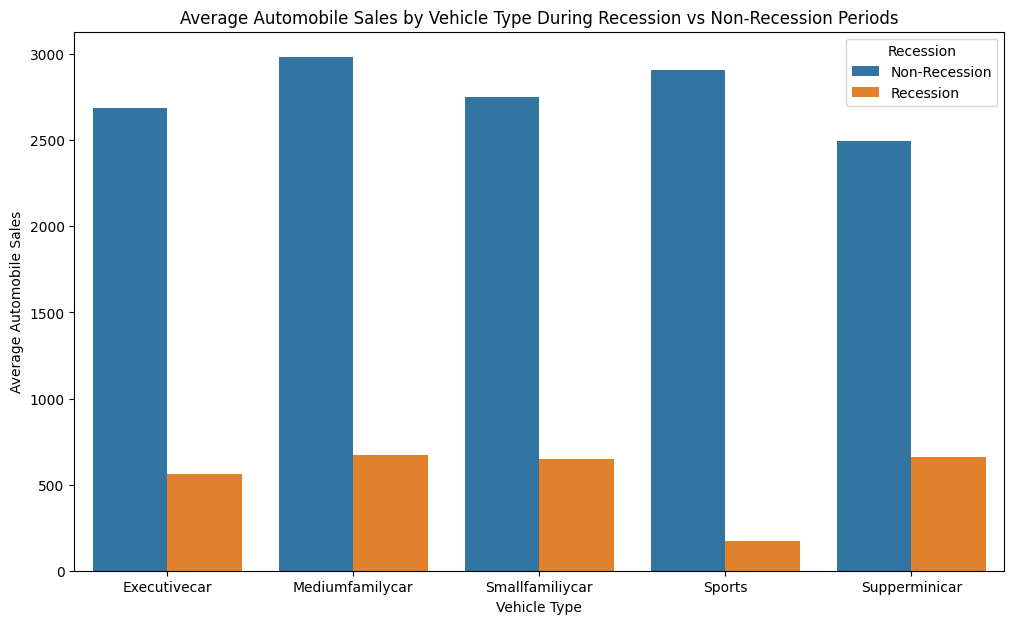

In [15]:
#Average Automobile Sales by Vehicle Tye During Recession vs Non-Recession Periods
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Recession and Vehicle_Type, calculate average Automobile_Sales
avg_sales_by_recession = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Map Recession column from 0/1 to more readable labels
avg_sales_by_recession['Recession'] = avg_sales_by_recession['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# Create barplot using seaborn
plt.figure(figsize=(12,7))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=avg_sales_by_recession)

# Add labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Vehicle Type During Recession vs Non-Recession Periods')

# Show the plot
plt.show()


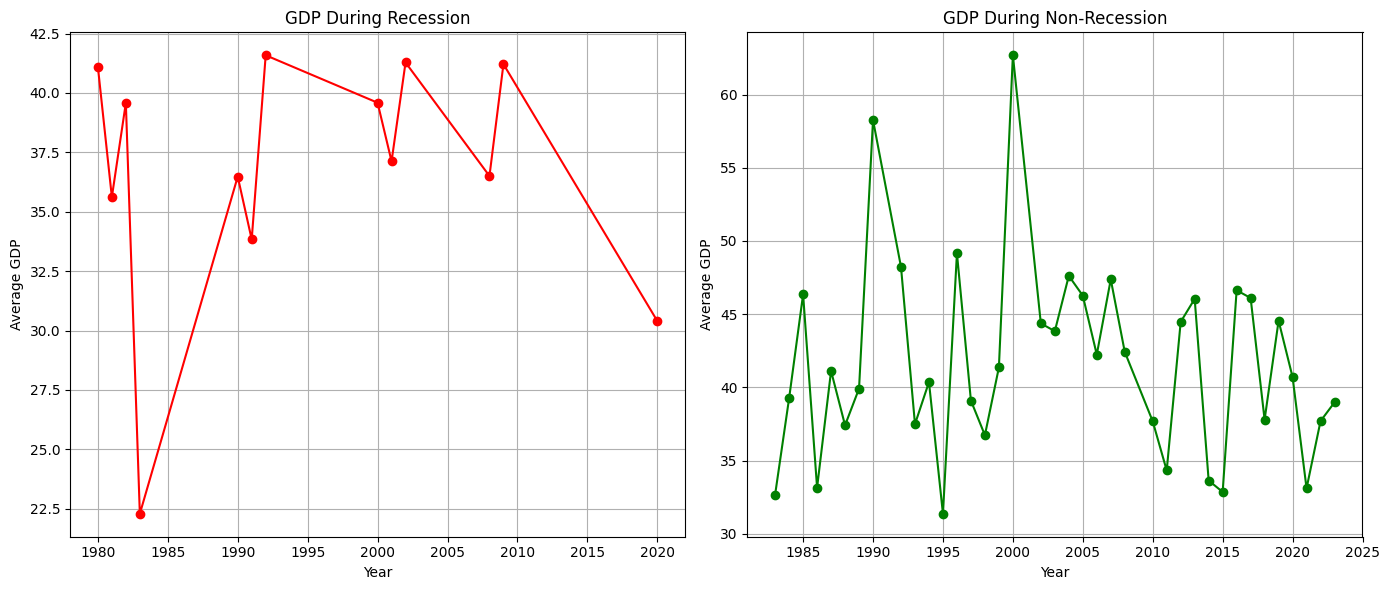

In [16]:
#GDP Variation during recession and non-recession periods
import matplotlib.pyplot as plt

# Filter dataset for recession and non-recession periods
recession_gdp = df[df['Recession'] == 1].groupby('Year')['GDP'].mean()
non_recession_gdp = df[df['Recession'] == 0].groupby('Year')['GDP'].mean()

# Create figure and two subplots side by side
fig = plt.figure(figsize=(14,6))

# Plot GDP during recession
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(recession_gdp.index, recession_gdp.values, marker='o', color='red')
ax1.set_title('GDP During Recession')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average GDP')
ax1.grid(True)

# Plot GDP during non-recession
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(non_recession_gdp.index, non_recession_gdp.values, marker='o', color='green')
ax2.set_title('GDP During Non-Recession')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average GDP')
ax2.grid(True)

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.savefig("Subplot.png", bbox_inches='tight')
plt.show()


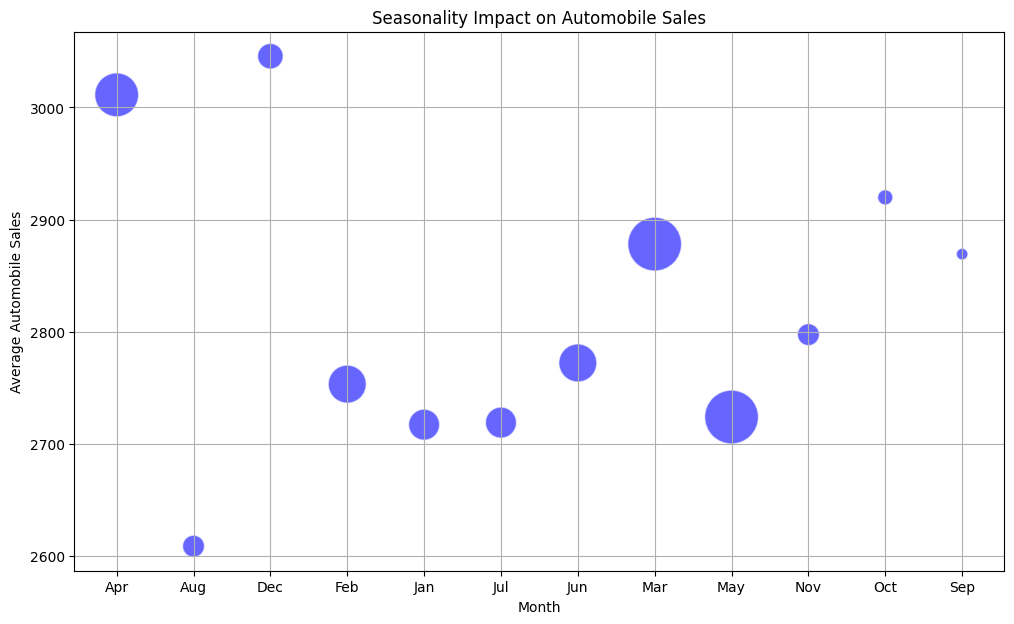

<Figure size 640x480 with 0 Axes>

In [17]:
#Seasonality Impact on Automobile Sales
import matplotlib.pyplot as plt

# Filter data for non-recession years (Recession == 0)
non_recession_df = df[df['Recession'] == 0]

# Group by Month, calculate average Automobile_Sales and Seasonality_Weight
monthly_stats = non_recession_df.groupby('Month').agg({'Automobile_Sales': 'mean', 'Seasonality_Weight': 'mean'}).reset_index()

# Create bubble plot using scatter
plt.figure(figsize=(12,7))
plt.scatter(
    monthly_stats['Month'],
    monthly_stats['Automobile_Sales'],
    s=monthly_stats['Seasonality_Weight'] * 1000,  # Scale size for better visibility
    alpha=0.6,
    edgecolors='w',
    color='blue'
)

# Add title and labels
plt.title('Seasonality Impact on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Average Automobile Sales')

# Optional: Add grid for clarity
plt.grid(True)

# Show the plot
plt.show()
plt.savefig("Bubble.png", bbox_inches='tight')


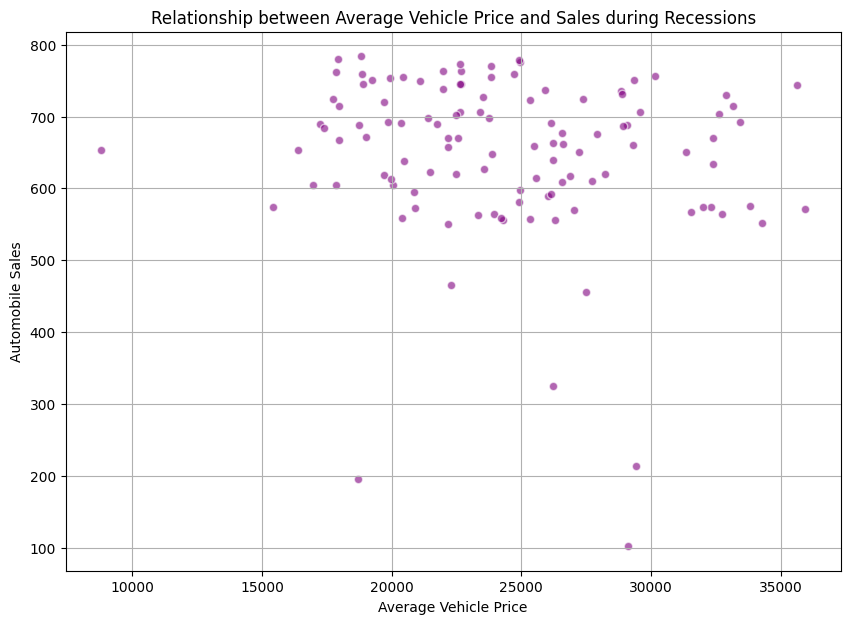

In [20]:
import matplotlib.pyplot as plt

# Filter dataframe for recession period (Recession == 1)
recession_df = df[df['Recession'] == 1]

# Scatter plot for Price vs Automobile Sales during recession
plt.figure(figsize=(10,7))
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'], alpha=0.6, color='purple', edgecolors='w')

# Add title and axis labels
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')

# Add grid for clarity
plt.grid(True)

# Show plot
plt.savefig("Scatter.png", bbox_inches='tight')
plt.show()



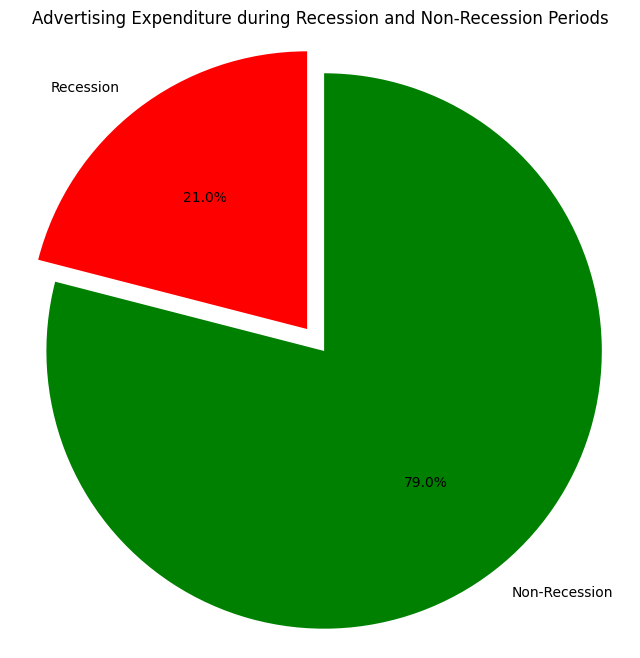

In [21]:
#Pie Chart displaying the portion of advertising expenditure during recession and non-recession periods.
import matplotlib.pyplot as plt

# Calculate total advertising expenditure during recession and non-recession periods
recession_ad_exp = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
non_recession_ad_exp = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Values and labels for pie chart
ad_exp_values = [recession_ad_exp, non_recession_ad_exp]
labels = ['Recession', 'Non-Recession']

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(ad_exp_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'], explode=(0.1, 0))
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular

# Show the plot
plt.savefig("Pie_1.png", bbox_inches='tight')
plt.show()


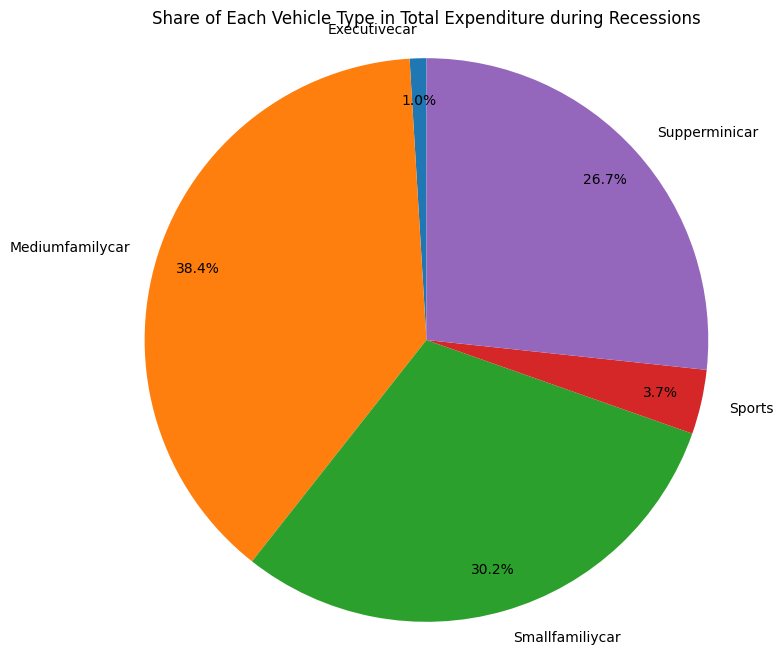

In [22]:
#Pie Chart to displayTotal Advertisement Expenditure for each vehicle type during recession period
import matplotlib.pyplot as plt

# Filter data for recession period (Recession == 1)
recession_df = df[df['Recession'] == 1]

# Group by Vehicle_Type and sum Advertising_Expenditure
ad_exp_by_vehicle = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Plot pie chart with labels
plt.figure(figsize=(8,8))
plt.pie(ad_exp_by_vehicle, labels=ad_exp_by_vehicle.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.axis('equal')  # Equal aspect ratio for circular pie

# Show the plot
plt.savefig("Pie_2.png", bbox_inches='tight')
plt.show()


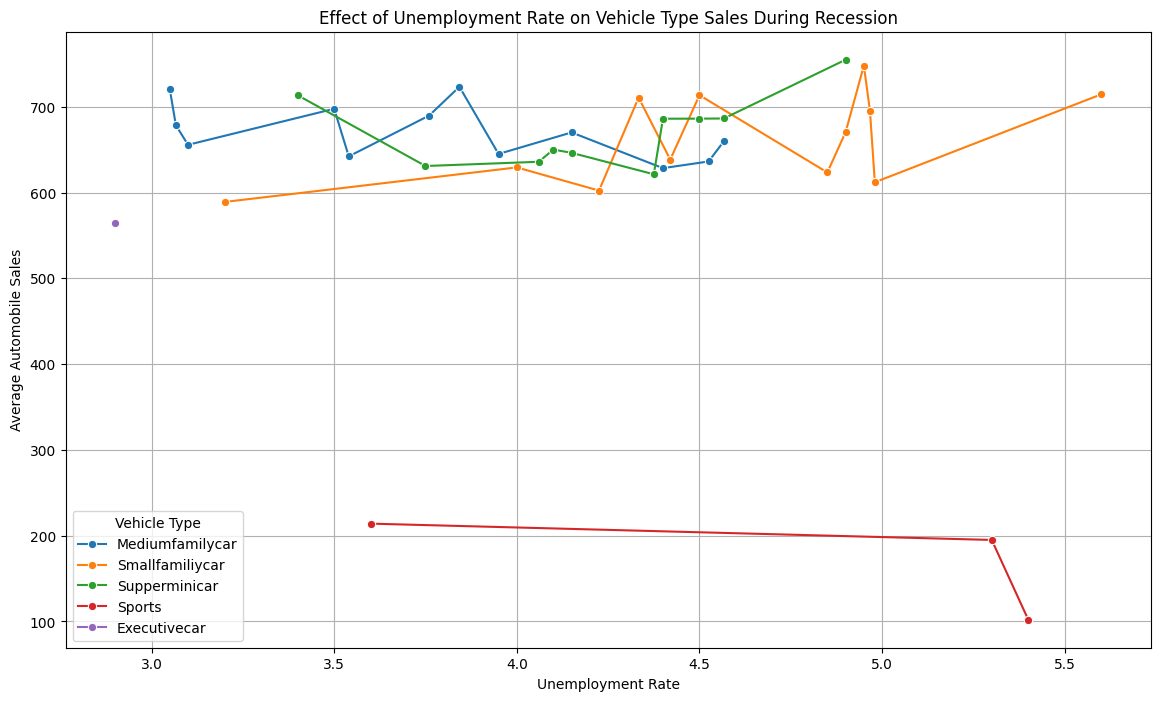

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for recession period
recession_df = df[df['Recession'] == 1]

# Group by Year, Vehicle_Type, calculate average Automobile_Sales and unemployment_rate
grouped = recession_df.groupby(['Year', 'Vehicle_Type']).agg({'Automobile_Sales': 'mean', 'unemployment_rate': 'mean'}).reset_index()

# Plot line plots for each Vehicle_Type showing unemployment rate vs automobile sales over years
plt.figure(figsize=(14,8))
sns.lineplot(data=grouped, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

# Add title and axis labels
plt.title('Effect of Unemployment Rate on Vehicle Type Sales During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Average Automobile Sales')

# Show grid for clarity
plt.grid(True)

# Show legend and plot
plt.legend(title='Vehicle Type')
plt.savefig("line_plot_3.png", bbox_inches='tight')
plt.show()


In [31]:
#Map showing Recession impact on various offices/citu sales by developing a choropleth
import pandas as pd
import folium

# Load data
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

# Filter recession data
recession_data = data[data['Recession'] == 1]

# Aggregate sales by city (or region column you have)
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Initialize map
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add choropleth layer
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # path to GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips separately from choropleth, via the layer's geojson attribute:
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1
map1.save('automobile_sales_recession_map.html')

